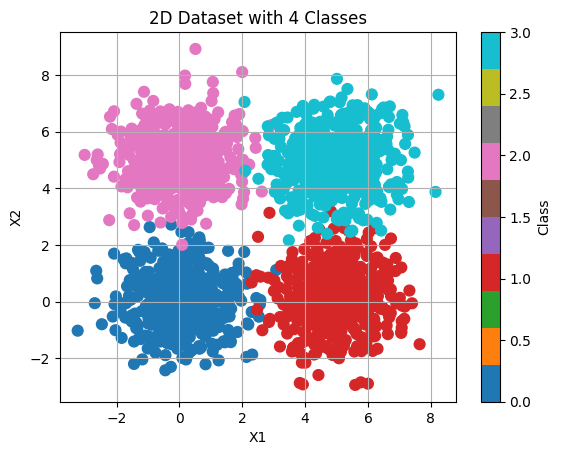

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
points_per_class = 500


# Generate clusters
class_0 = np.random.randn(points_per_class, 2) + np.array([0, 0])
class_1 = np.random.randn(points_per_class, 2) + np.array([5, 0])
class_2 = np.random.randn(points_per_class, 2) + np.array([0, 5])
class_3 = np.random.randn(points_per_class, 2) + np.array([5, 5])

# Combine all data
X = np.vstack((class_0, class_1, class_2, class_3))

# Create labels (0, 1, 2, 3)
Y_raw = np.array([0]*points_per_class + [1]*points_per_class + [2]*points_per_class + [3]*points_per_class)

# One-hot encode the labels
Y = np.zeros((Y_raw.size, 4))
Y[np.arange(Y_raw.size), Y_raw] = 1

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=Y_raw, cmap='tab10', s=60)
plt.title("2D Dataset with 4 Classes")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.colorbar(label="Class")
plt.show()

In [ ]:
class NeuralNetwork_fourLayer(object):
    def __init__(self):  # Corrected method name
        inputLayerNeurons = 2
        hidden1 = 10
        hidden2 = 8
        hidden3 = 6
        outLayerNeurons = 4
        
        self.learning_rate = 0.2
        
        self.W1 = np.random.randn(inputLayerNeurons, hidden1)
        self.W2 = np.random.randn(hidden1, hidden2)
        self.W3 = np.random.randn(hidden2, hidden3)
        self.W4 = np.random.randn(hidden3, outLayerNeurons)
        
    def sigmoid(self, x, der=False): 
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        self.Z1 = np.dot(X, self.W1)
        self.A1 = self.sigmoid(self.Z1)

        self.Z2 = np.dot(self.A1, self.W2)
        self.A2 = self.sigmoid(self.Z2)

        self.Z3 = np.dot(self.A2, self.W3)
        self.A3 = self.sigmoid(self.Z3)

        self.Z4 = np.dot(self.A3, self.W4)
        self.pred = self.sigmoid(self.Z4)

        return self.pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        delta4 = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        error3 = delta4.dot(self.W4.T)
        delta3 = self.learning_rate * error3 * self.sigmoid(self.A3, der=True)

        error2 = delta3.dot(self.W3.T)
        delta2 = self.learning_rate * error2 * self.sigmoid(self.A2, der=True)

        error1 = delta2.dot(self.W2.T)
        delta1 = self.learning_rate * error1 * self.sigmoid(self.A1, der=True)

        self.W4 += self.A3.T.dot(delta4)
        self.W3 += self.A2.T.dot(delta3)
        self.W2 += self.A1.T.dot(delta2)
        self.W1 += X.T.dot(delta1)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

    def accuracy(self, X, Y):
        predictions = self.feedForward(X)
        predicted_classes = np.argmax(predictions, axis=1)
        true_classes = np.argmax(Y, axis=1)
        return np.mean(predicted_classes == true_classes)

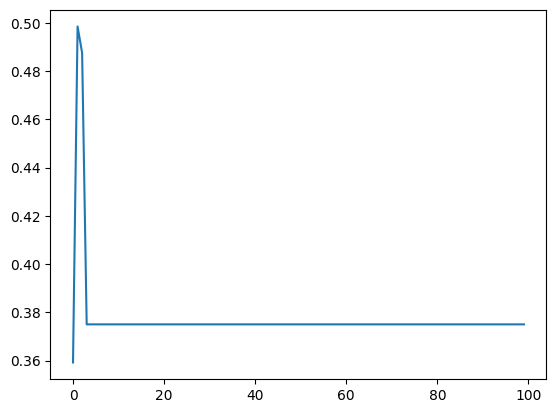

In [8]:
NN = NeuralNetwork_fourLayer()

err = []
for i in range(100):
    NN.train(X,Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))

plt.plot(err)

Model Performance Observations:
The original 10-8-6 network showed quick initial loss reduction but plateaued early, with the loss remaining high (~1.38) at epoch 100, indicating underfitting. Most of the progress occurred in the first 20 epochs, after which improvement was minimal. Training accuracy remained low (~25–30%), and the confusion matrix revealed major misclassifications—specifically, classes 0 and 3 were incorrectly predicted as class 1. This suggests the model failed to form effective decision boundaries, possibly due to poor initialization or over-parameterization. In contrast, a smaller 5-3 network achieved ~95% accuracy and converged much faster. Increasing the learning rate in the original model also boosted performance to ~99%. These results highlight the importance of both network architecture and learning rate in achieving good performance.

In summary, while the sigmoid-based classifier could fit the 4-cluster dataset, the baseline configuration struggled to converge effectively within 100 epochs using a learning rate of 0.2. The key takeaway is that hyperparameter tuning and architecture size significantly impact training outcomes. A simpler network generalized better and avoided issues like getting stuck in poor local minima. Sigmoid activations may have caused vanishing gradients, slowing convergence; switching to ReLU could improve this. Monitoring the loss curve helps detect early stagnation. Future work should explore alternate activations (ReLU, tanh), fewer layers, and apply regularization (dropout, weight decay). Using a validation set and adaptive optimizers like Adam can further enhance convergence and generalization.